In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import numpy as np
from textblob import TextBlob


**AYUDA ORGANICS FOOT FALL.csv**


In [ ]:
# Read the CSV file into a pandas dataframe
df = pd.read_csv('Ayuda Organics Foot Fall.csv')

***Trend Analysis***

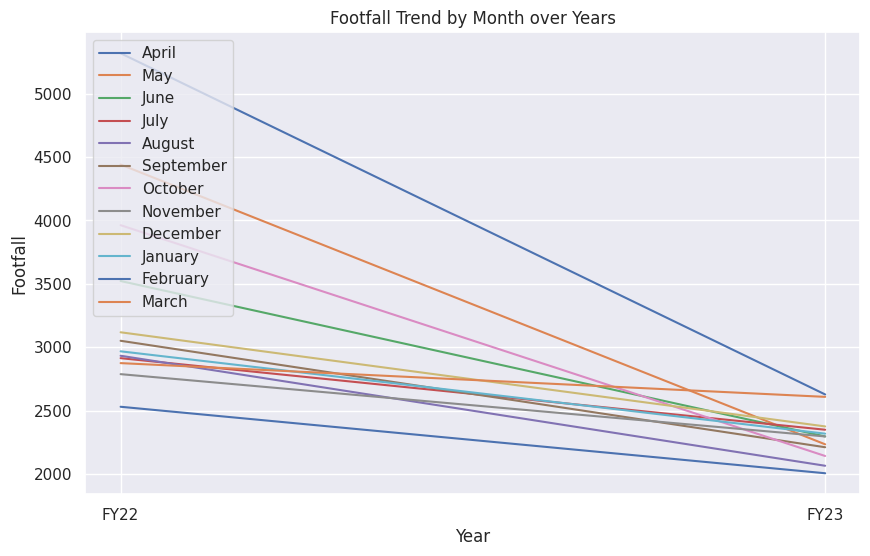

In [ ]:
df = df.sort_values(by='Foot Fall', ascending=True)
months = ['April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December', 'January', 'February', 'March']
for month in months:
    plt.plot(df['Foot Fall'], df[month], label=month)
plt.title('Footfall Trend by Month over Years')
plt.xlabel('Year')
plt.ylabel('Footfall')
plt.legend(loc='upper left')
plt.show()


**Conclusion** : there is a sharp fall in the number of footsteps;
***Reason*** - we came to know that the firm has decreased their number of retails stores from 8 to 5

*Footfall over the months*

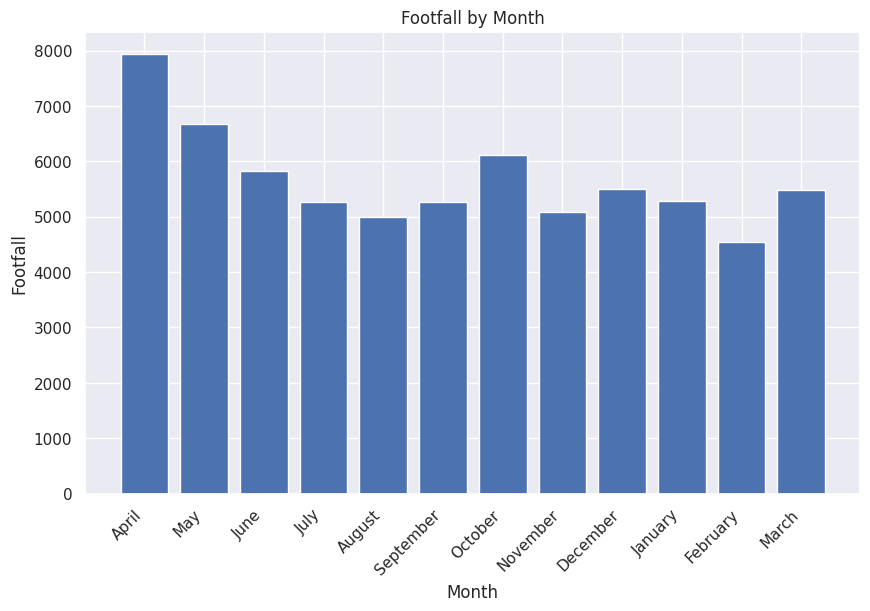

In [ ]:
# Seasonal analysis
# Read the CSV file into a pandas dataframe
#df = pd.read_csv('Ayuda Organics Foot Fall.csv')

months = ['April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December', 'January', 'February', 'March']
df_months = df[months].sum()
plt.bar(df_months.index, df_months)
plt.title('Footfall by Month')
plt.xlabel('Month')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Footfall')
plt.show()

***Dot Plot*** - display data by using dots to represent values on a number line

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'April'),
  Text(1, 0, 'May'),
  Text(2, 0, 'June'),
  Text(3, 0, 'July'),
  Text(4, 0, 'August'),
  Text(5, 0, 'September'),
  Text(6, 0, 'October'),
  Text(7, 0, 'November'),
  Text(8, 0, 'December'),
  Text(9, 0, 'January'),
  Text(10, 0, 'February'),
  Text(11, 0, 'March')])

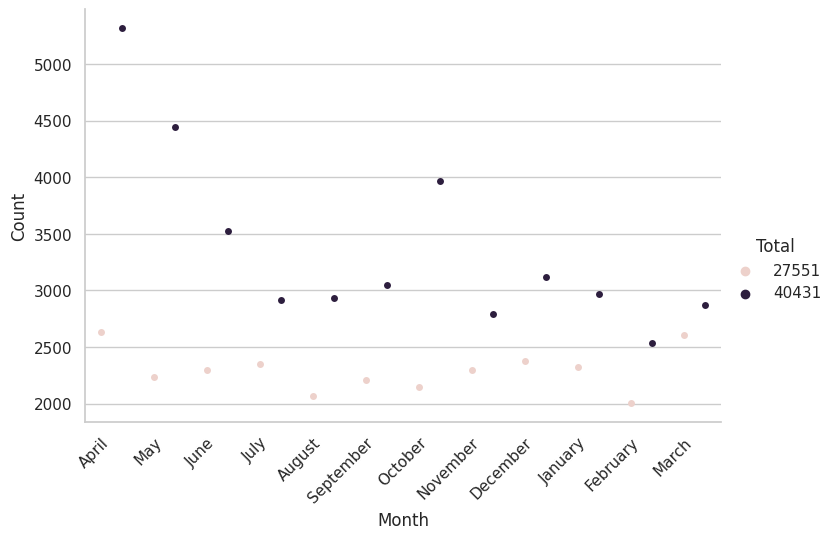

In [ ]:
import pandas as pd
import seaborn as sns

# Melt data
df_melted = pd.melt(df, id_vars=['Foot Fall', 'Total'], var_name='Month', value_name='Count')

# Plot dot plot
sns.set_style("whitegrid")
sns.catplot(data=df_melted, x='Month', y='Count', hue='Total', jitter=0.4, dodge=True, height=5, aspect=1.5, kind='strip')
plt.xticks(rotation=45, ha='right')

**PIE CHART**

*Percentage of foot fall by month*

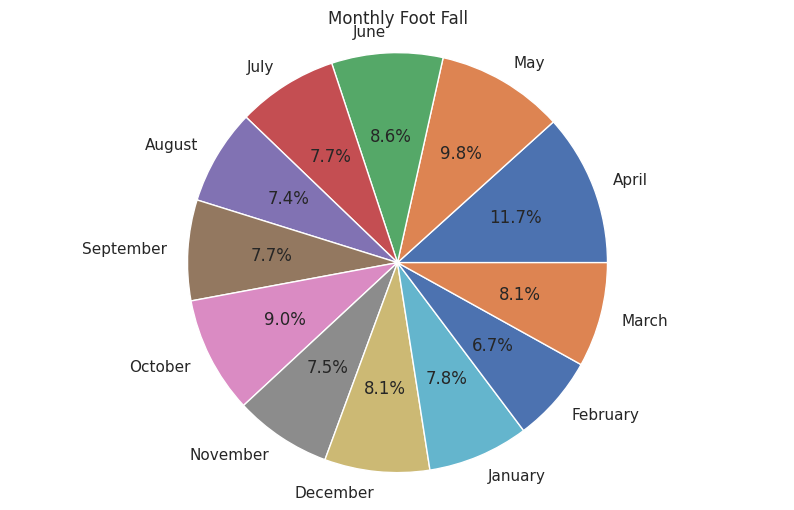

In [ ]:

# Calculate total foot fall by month
foot_fall_by_month = df[['April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December', 'January', 'February', 'March']].sum()

# Create pie chart
labels = ['April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December', 'January', 'February', 'March']
sizes = foot_fall_by_month.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Monthly Foot Fall')
plt.show()

***Heatmap*** - representation of data in which values are represented by colors

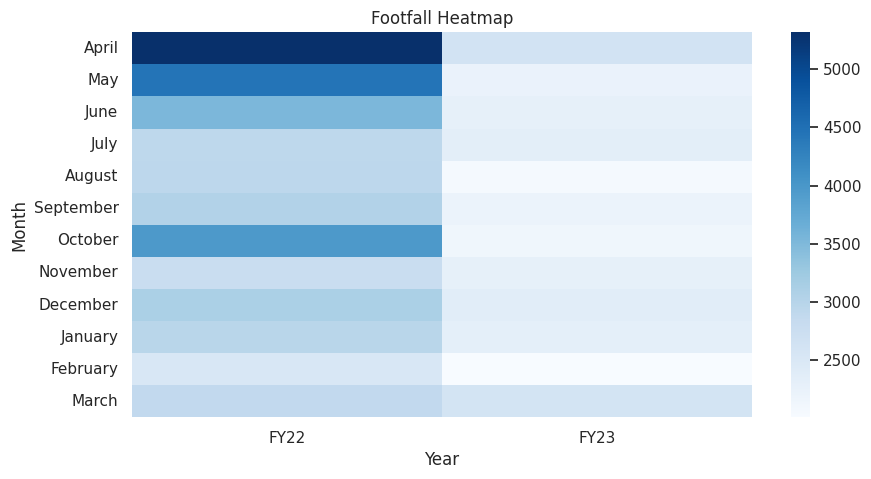

In [ ]:
# Heatmap
df_heatmap = df[months].transpose()
df_heatmap.columns = df['Foot Fall']
plt.figure(figsize=(10, 5))
sns.heatmap(df_heatmap, cmap='Blues')
plt.title('Footfall Heatmap')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()


**Conclusion** : ***April*** Month is showing the best figures ; while ***February*** Month is having least number of footfalls; business stratigies should be modified accordingly

***t-test*** - method used to determine if there is a significant difference between the means of two groups

In [ ]:

# Compute t-test between two groups
group1 = df['July']
group2 = df['August']
t_statistic, p_value = stats.ttest_ind(group1, group2)

# Print results
print('T-statistic  :', t_statistic)
print('P-value      :', p_value)

if p_value < 0.05:
    print('There is a significant difference between the two groups.')
else:
    print('There is no significant difference between the two groups.')


T-statistic  : 0.2562109117061815
P-value      : 0.8217334413801111
There is no significant difference between the two groups.


**Conclusion**  : *No significant difference* between the mentioned two groups

**AYUDA ORGANICS DAILY SALES. csv**


In [ ]:
# Load data from CSV file
data = pd.read_csv('Ayuda Organics Daily Sales.csv')


*Average Sales, Returns and Net Sales By month*

In [ ]:
# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Group data by month and calculate average values
monthly_averages = data.groupby(data['Date'].dt.to_period('M')).mean()

# Print monthly averages
monthly_averages


<ipython-input-247-4e26b2edf065>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_averages = data.groupby(data['Date'].dt.to_period('M')).mean()


,Sales,Return,Net Sales
Date,,,
2022-04,115623.976333,1240.996000,114382.980333
2022-05,94168.880000,1216.345806,92952.534194
2022-06,100121.154000,1033.708000,99087.446000
2022-07,88202.200645,554.012903,87648.187742
2022-08,76093.090000,460.710323,75632.379677
2022-09,83250.479667,407.956667,82842.523000
2022-10,79183.329355,1086.551613,78096.777742
2022-11,83352.755000,1021.364000,82331.391000
2022-12,92548.641613,607.497742,91941.143871


**Conclusion**:April has highest sales

Businesses can use this information to understand the seasonality of
sales or to identify changes in consumer behavior over time. The monthly averages can also be used to track the performance of marketing campaigns or to compare the performance of different products or brands.


*Standard Deviation in sales average over 12 months*

In [ ]:

# Calculate standard deviation of monthly averages
monthly_std = monthly_averages.std()

# Print monthly standard deviation
monthly_std


Sales        11223.025425
Return         298.858261
Net Sales    11067.657705
dtype: float64

*Absolute deviation in sales average over 12 months*

In [ ]:

monthly_mad = monthly_averages.mad()

# Print monthly mean absolute deviation
print(monthly_mad)


Sales        8906.852492
Return        257.742618
Net Sales    8765.600431
dtype: float64


<ipython-input-249-34e85dcccf17>:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  monthly_mad = monthly_averages.mad()


*Line Graph of monthly sales*

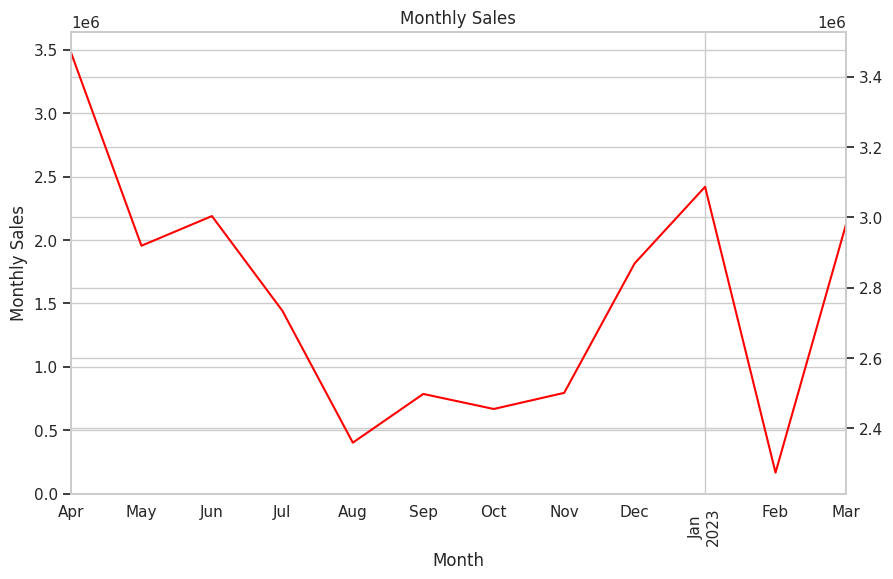

In [ ]:
# Load data from CSV file
data = pd.read_csv('Ayuda Organics Daily Sales.csv')

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Group data by month
monthly_data = data.groupby(data['Date'].dt.to_period('M'))

# Calculate sum of monthly sales
monthly_sales = monthly_data['Sales'].sum()

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot bar graph of monthly sales
monthly_sales.plot.bar(ax=ax, color='blue')

# Set y-axis label for bar graph
ax.set_ylabel('Monthly Sales')

# Create a second y-axis for line graph
ax2 = ax.twinx()

# Plot line graph of monthly sales
monthly_sales.plot(ax=ax2, color='red')

# Set plot title and x-axis label
ax.set_title('Monthly Sales')
ax.set_xlabel('Month')

# Show plot
plt.show()


*Bar Graph of monthly sales*

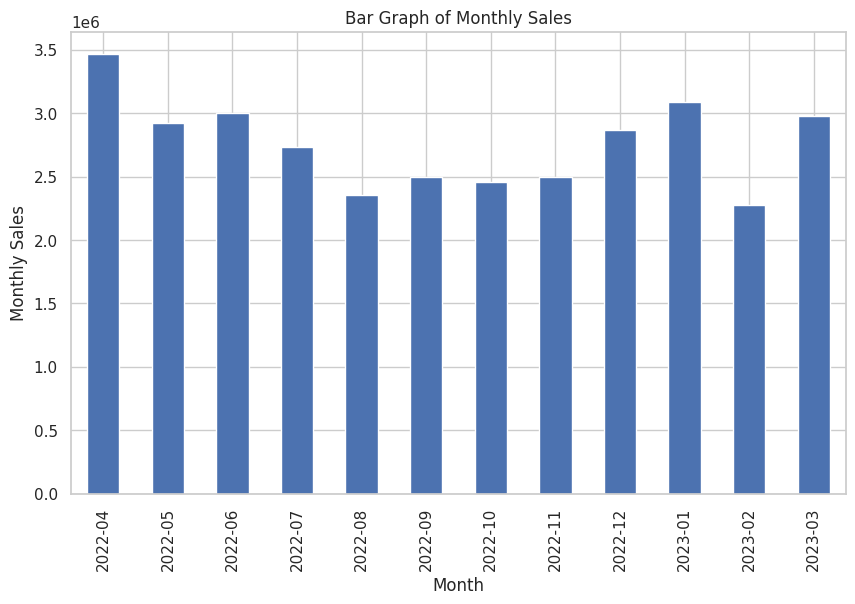

In [ ]:

# Plot bar graph of monthly sales
monthly_sales.plot.bar()

# Set plot title and axis labels
plt.title('Bar Graph of Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Monthly Sales')

# Show plot
plt.show()


**Conclusion**: Sales are higher in month of april.
This information can be useful for identifying seasonality, trends, and patterns in the sales data.
Businesses can use this information to optimize their inventory, adjust their pricing strategies.

***Box Plot*** - graphical representation of the distribution of a dataset. It shows the median (middle value), the first and third quartiles (the 25th and 75th percentiles, respectively), and the minimum and maximum values. The box itself represents the interquartile range (IQR), which is the distance between the first and third quartiles. The plot also includes outliers, which are points that fall outside the whiskers of the box. Box plots are useful for identifying the spread of the data, the location of the central tendency, and the presence of outliers.

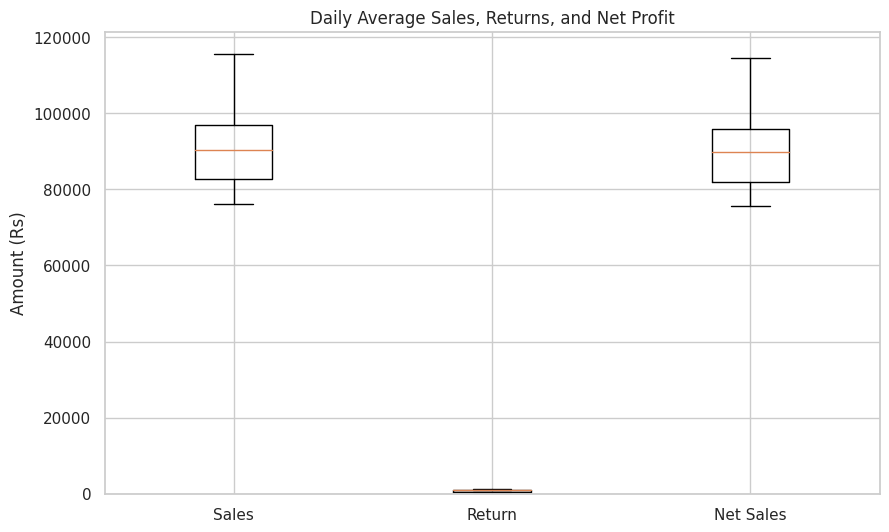

In [ ]:
# Load data from CSV file
data = pd.read_csv('Ayuda Organics Daily Sales.csv')

# Convert the 'Date' column to a datetime object
data['Date'] = pd.to_datetime(data['Date'])

# Group the data by month and calculate the average for each column
monthly_data = data.groupby(pd.Grouper(key='Date', freq='M')).mean()

# Create a list of columns to plot
cols = ['Sales', 'Return', 'Net Sales']

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot box plots of the columns
ax.boxplot([monthly_data[col] for col in cols])

# Set y-axis label and limits
ax.set_ylabel('Amount (Rs)')
ax.set_ylim(bottom=0)

# Set x-tick labels
ax.set_xticklabels(cols)

# Set plot title
ax.set_title('Daily Average Sales, Returns, and Net Profit')

# Show plot
plt.show()


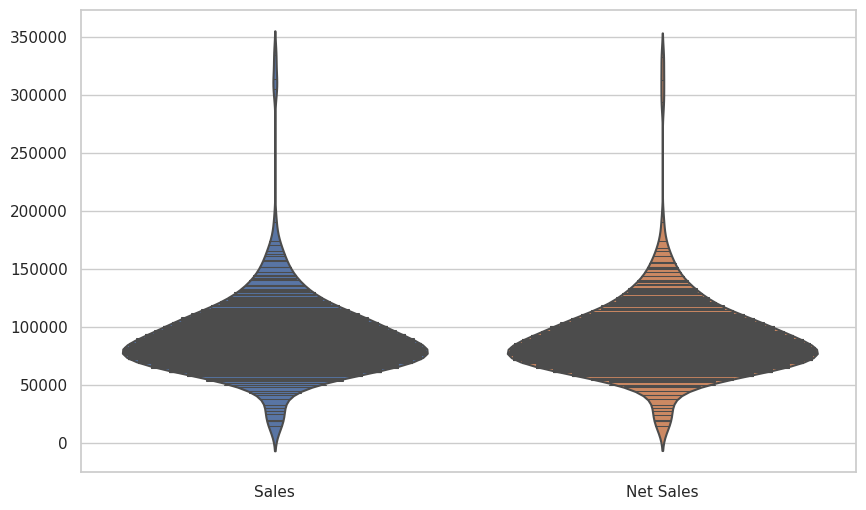

In [ ]:
# Load the sales data into a pandas DataFrame
sales_df = pd.read_csv('Ayuda Organics Daily Sales.csv')

# Create a violin plot of sales and net sales with amount
sns.violinplot(data=sales_df[['Sales', 'Net Sales']], inner='stick')

# Display the plot
plt.show()


*Violin Plot* - combines aspects of a box plot and a kernel density plot

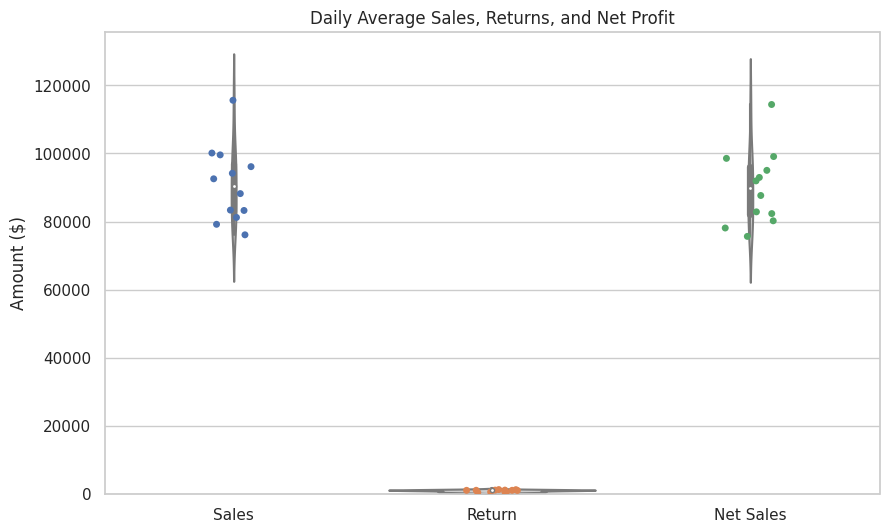

In [ ]:

# Create a figure and axis object
fig, ax = plt.subplots()
ax=sns.stripplot(data=monthly_data)
ax=sns.violinplot(data=monthly_data,color="0.8")
# Plot strip plots of the columns
#sns.stripplot(data=monthly_data, ax=ax)

# Set y-axis label and limits
ax.set_ylabel('Amount ($)')
ax.set_ylim(bottom=0)

# Set x-tick labels
ax.set_xticklabels(monthly_data.columns)

# Set plot title
ax.set_title('Daily Average Sales, Returns, and Net Profit')

# Show plot
plt.show()


**Conclusion** Majority of montly average sales in between 80 thousand and 1 lack, return remain low.

**Scatter Plot**
A scatter plot can convey a few different things:

The strength and direction of the relationship between two variables: If the dots on the scatter plot form a clear pattern, it suggests that there is a relationship between the variables. If the dots are clustered closely together, it indicates a strong correlation. If the dots are more spread out, it suggests a weaker correlation. The slope and direction of the pattern can indicate the direction of the relationship.

Outliers: Scatter plots can also help to identify any outliers or extreme values that may be present in the data. These are points that fall far away from the main cluster of dots and can have a significant impact on the overall pattern.

Clustering and grouping: In some cases, the dots on a scatter plot may cluster together in distinct groups or patterns. This can suggest the presence of different subgroups or categories within the data.

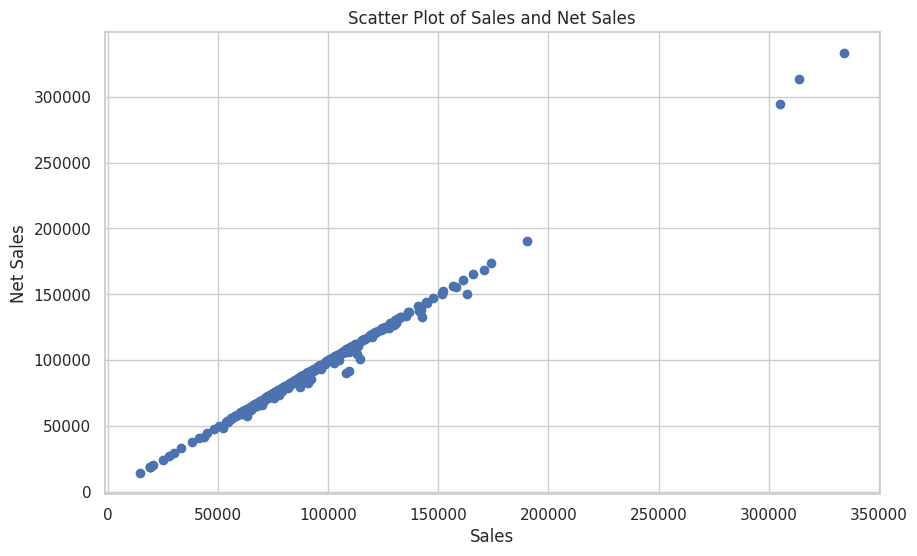

In [ ]:
# Load the sales data into a pandas DataFrame
sales_df = pd.read_csv('Ayuda Organics Daily Sales.csv')

# Create a scatter plot of sales and net sales
fig, ax = plt.subplots()
ax.scatter(sales_df['Sales'], sales_df['Net Sales'])

# Add labels and title
plt.xlabel('Sales')
plt.ylabel('Net Sales')
plt.title('Scatter Plot of Sales and Net Sales')

# Display the plot
plt.show()


**Conclusion** : *Strong Positive Co-orelation* between Sales and Net Sales

*Pair Plot* - displays pairwise relationships between variables in a dataset. It is a grid of plots where each variable is compared to every other variable in terms of scatterplots, histograms, or other types of visualizations.

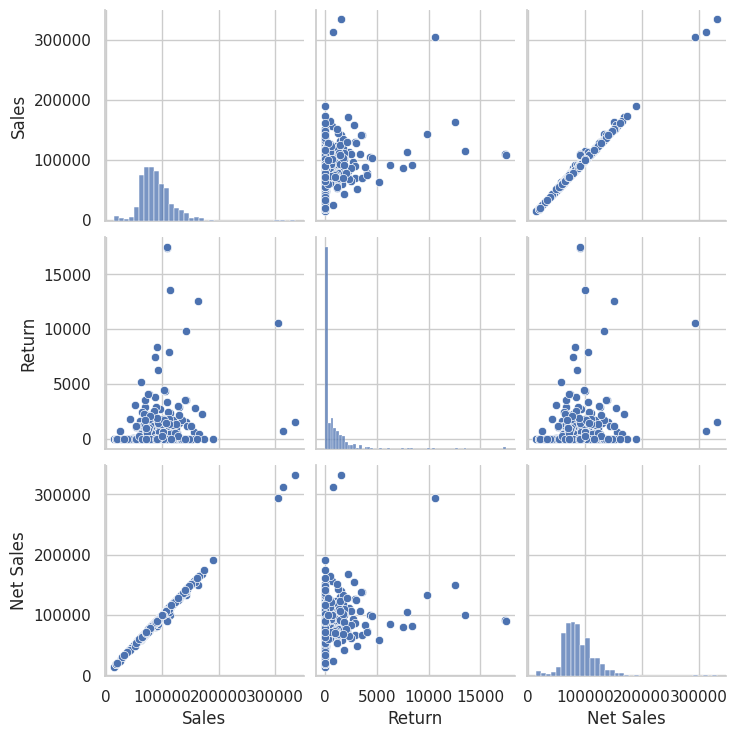

In [ ]:
# Create a pair plot of all variables in the DataFrame
sns.pairplot(sales_df)

# Display the plot
plt.show()

**Conslusion** : Returns are too low, hence not affecting the other two variables much, which is a good sign for the business

*Daily Sales vs Net Sales*

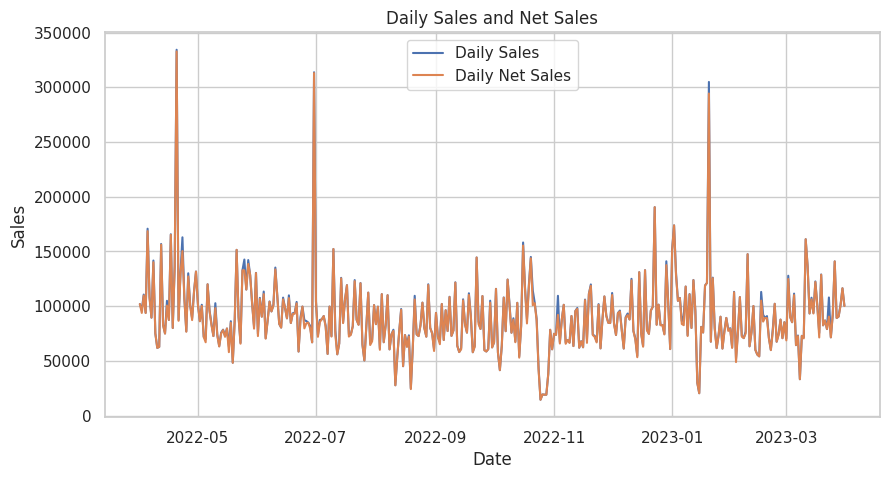

In [ ]:

# Group data by day and calculate daily sales and net sales
daily_sales = data.groupby('Date')['Sales'].sum()
daily_net_sales = data.groupby('Date')['Net Sales'].sum()


# Plot daily sales and net sales figures over time
plt.figure(figsize=(10,5))
plt.plot(daily_sales, label='Daily Sales')
plt.plot(daily_net_sales, label='Daily Net Sales')
plt.title('Daily Sales and Net Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


*What are the average daily sales figures for different days of the week?*

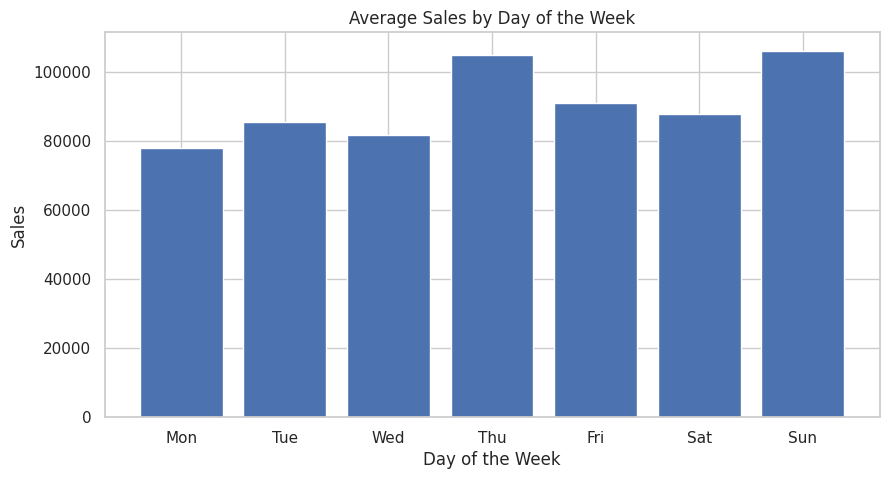

In [ ]:

# Group data by day of the week and calculate average sales figures
weekday_sales = data.groupby(data['Date'].dt.weekday)['Sales'].mean()


# Plot average sales figures for each day of the week
plt.figure(figsize=(10,5))
plt.bar(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], weekday_sales)
plt.title('Average Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Sales')
plt.show()


**Conclusion** : ***Sunday*** is showing the best sales

*Correlation between Sales and Weekdays* - graphical representation of the relationship between two or more variables

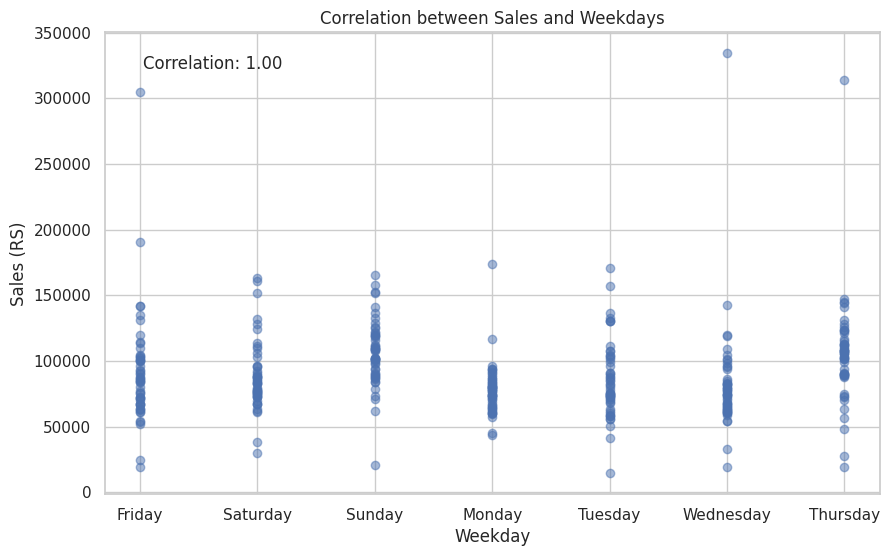

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Load the data from the CSV file
data = pd.read_csv('Ayuda Organics Daily Sales.csv')

# Convert the date column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Extract the weekday name from the date column
data['Weekday'] = data['Date'].dt.day_name()

# Calculate the correlation between sales and weekdays
correlation = data[['Sales', 'Weekday']].groupby('Weekday').corr().iloc[0::2, -1]

# Create a scatter plot of sales vs. weekdays
fig, ax = plt.subplots()
ax.scatter(data['Weekday'], data['Sales'], alpha=0.5)

# Add a trendline to the plot
# z = np.polyfit(data['Weekday'].cat.codes, data['Sales'], 1)
# p = np.poly1d(z)
# ax.plot(data['Weekday'], p(data['Weekday'].cat.codes), 'r--')

# Add labels and title
plt.xlabel('Weekday')
plt.ylabel('Sales (RS)')
plt.title('Correlation between Sales and Weekdays')

# Add a text box with the correlation value
corr_text = 'Correlation: {:.2f}'.format(correlation.mean())
plt.text(0.05, 0.95, corr_text, transform=ax.transAxes, fontsize=12, verticalalignment='top')

# Display the plot
plt.show()


*Are there any seasonal patterns or trends in the daily sales figures?*

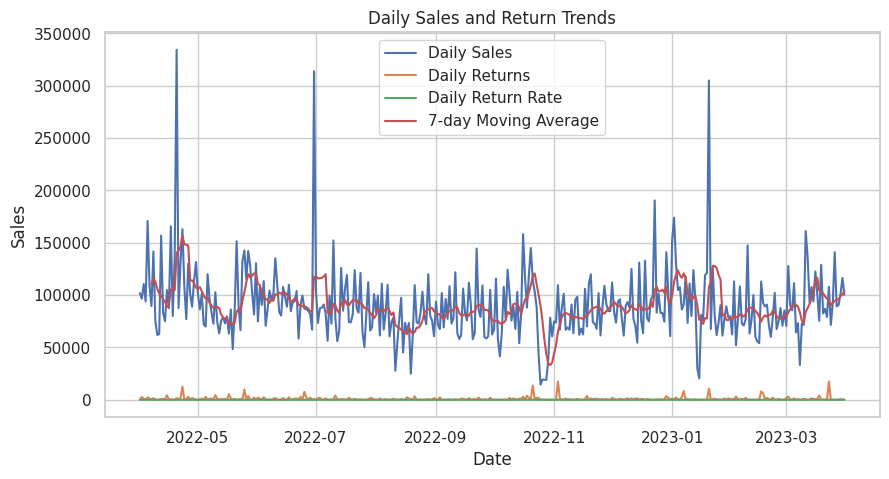

In [ ]:
# Load data from CSV file
data = pd.read_csv('Ayuda Organics Daily Sales.csv')

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Group data by day and calculate daily sales and return figures
daily_sales = data.groupby('Date')['Sales'].sum()
daily_returns = data.groupby('Date')['Return'].sum()
# Calculate 7-day moving average of daily sales
ma_daily_sales = daily_sales.rolling(window=7).mean()

# Calculate daily return rate as a percentage of daily sales
daily_return_rate = (daily_returns / daily_sales) * 100

# Plot daily return rate and daily sales figures over time
plt.figure(figsize=(10,5))
plt.plot(daily_sales, label='Daily Sales')
plt.plot(daily_returns, label='Daily Returns')
plt.plot(daily_return_rate, label='Daily Return Rate')
plt.plot(ma_daily_sales, label='7-day Moving Average')
plt.title('Daily Sales and Return Trends')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


***Statistical Analysis***

In [ ]:
# Load data into a pandas dataframe
df = pd.read_csv('Ayuda Organics Daily Sales.csv')

# Split data into two samples
sales_sample = df['Sales']
return_sample = df['Return']

# Perform two-sample t-test
t_stat, p_val = stats.ttest_ind(sales_sample, return_sample)

# Compute means and standard deviations
sales_mean = sales_sample.mean()
return_mean = return_sample.mean()
sales_std = sales_sample.std()
return_std = return_sample.std()

# Compute the standard error of the difference between means
se_diff = ((sales_std ** 2 / len(sales_sample)) + (return_std ** 2 / len(return_sample))) ** 0.5

# Compute the 95% confidence interval for the difference between means
ci_low, ci_high = stats.t.interval(0.95, len(df) - 2, loc=sales_mean - return_mean, scale=se_diff)

# Print results
print("t-statistic    :", t_stat)
print("p-value        :", p_val)
print("Sales mean     :", sales_mean)
print("Return mean    :", return_mean)
print("Sales standard deviation    :", sales_std)
print("Return standard deviation   :", return_std)
print("95% confidence interval for the difference between means  :", (ci_low, ci_high))

t-statistic    : 50.30843482340228
p-value        : 3.815435004467718e-239
Sales mean     : 90813.488
Return mean    : 893.0475342465753
Sales standard deviation    : 34086.391490947615
Return standard deviation   : 2048.7222829379634
95% confidence interval for the difference between means  : (86405.51493078847, 93435.36600071836)


***Q-Q Plot*** - graphical technique used to compare the distribution of a sample to a theoretical distribution, such as a normal distribution. It plots the quantiles of the sample data against the corresponding quantiles of the theoretical distribution, and if the sample data come from the specified distribution, the points on the plot should fall along a straight line. This allows for visual inspection of the degree of agreement between the sample data and the theoretical distribution

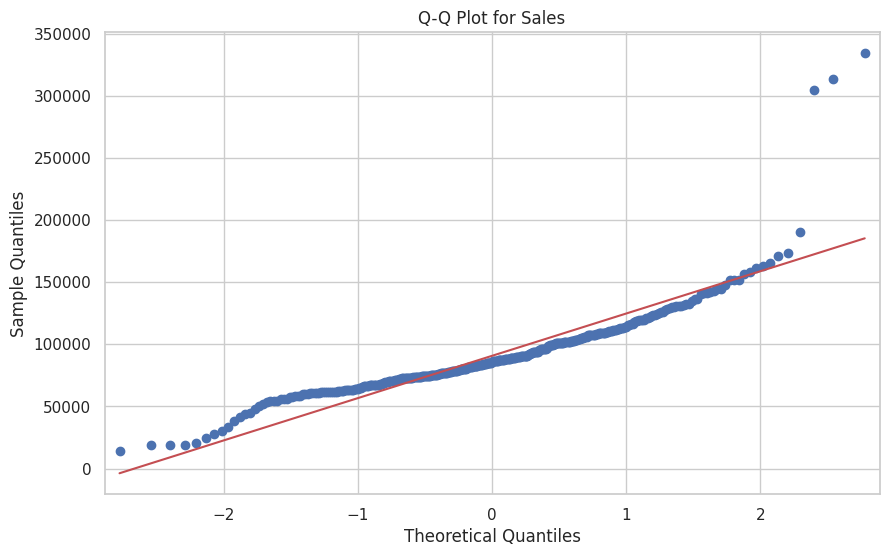

In [ ]:

# Create Q-Q plot
sm.qqplot(df['Sales'], line='s')

# Add labels and title
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.title('Q-Q Plot for Sales')

# Display plot
plt.show()


**Conclusion** : Validates  the degree of agreement between the sample data and the theoretical distribution

***Kernel Density Plot***

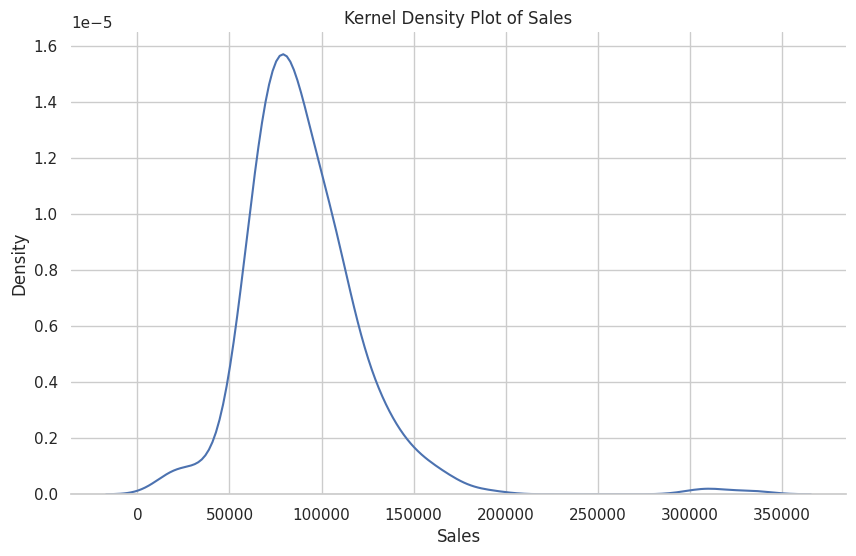

In [ ]:

# Create a kernel density plot of Sales and Return columns
sns.kdeplot(data=df['Sales'], label='Sales', legend=True)
#sns.kdeplot(data=df['Return'], label='Return', legend=True)

# Add axis labels and title
sns.set_style('whitegrid')
sns.set_palette('bright')
sns.set(rc={'figure.figsize':(10,6)})
sns.despine(left=True)
plt.xlabel('Sales')
plt.ylabel('Density')
plt.title('Kernel Density Plot of Sales')

# Show the plot
plt.show()


***Correlogram***

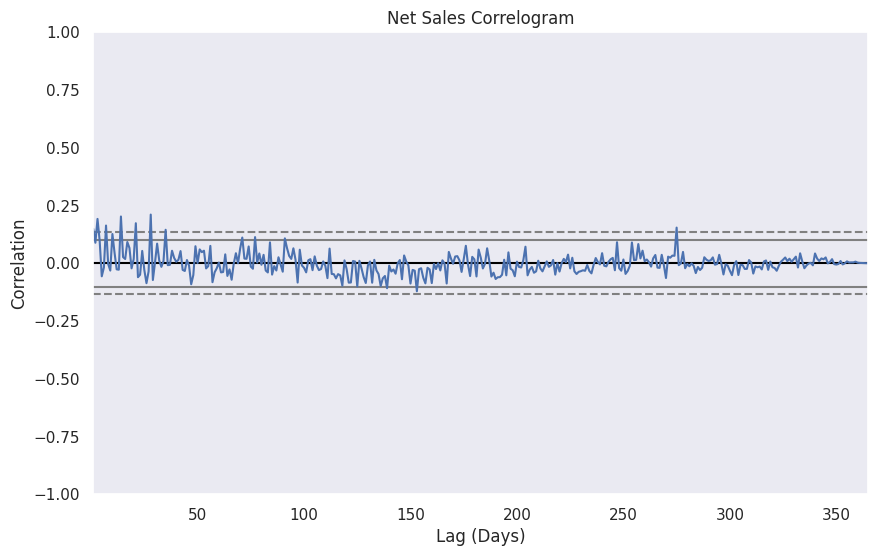

In [ ]:
# Compute autocorrelation function (ACF) for Net Sales
acf = pd.plotting.autocorrelation_plot(df['Net Sales'])

# Set plot title and axis labels
plt.title('Net Sales Correlogram')
plt.xlabel('Lag (Days)')
plt.ylabel('Correlation')

# Display plot
plt.show()

**Conclusion** : The correlogram shows a repeating pattern in sales over time, indicating a seasonal component to the sales data. This can be useful for identifying the best times to run promotions or adjust marketing strategies to capitalize on seasonal trends.

*Random Sampling*

In [ ]:
# Set seed for reproducibility
np.random.seed(42)

# Random sampling
n = 10 # sample size
rand_sample = df['Sales'].sample(n)
print("Random sample:")
print(rand_sample)




Random sample:
193     88922.55
33      71885.10
15      87475.32
309     76936.89
57     128268.08
183     66925.33
76      88881.79
119     66088.37
152     60651.66
126     67032.93
Name: Sales, dtype: float64


*Systematic Sampling*

In [ ]:
# Systematic sampling
start = 0 # starting point
k = 7 # interval
sys_sample = df.iloc[start::k]['Sales'][:n]
print("\nSystematic sample:")
print(sys_sample)


Systematic sample:
0     101922.15
7     141718.96
14    104887.98
21    130836.37
28    113753.07
35    119994.09
42     75735.47
49     87064.06
56    142128.48
63     90524.46
Name: Sales, dtype: float64


*Stratified Sampling*

In [ ]:
# Stratified sampling
n = 5 # sample size per stratum
strata = pd.qcut(df['Sales'], 3) # divide data into 3 strata based on quantiles
stratified_sample = df.groupby(strata, group_keys=False).apply(lambda x: x.sample(min(len(x), n)))
print("\nStratified sample:")
print(stratified_sample['Sales'])


Stratified sample:
208     19270.00
260     63511.46
46      63157.37
92      73398.31
234     74114.52
63      90524.46
68      95185.45
245     84269.68
324     90915.18
12      83142.55
237    101861.87
314    147539.51
362    101135.39
125    110989.27
328    102176.60
Name: Sales, dtype: float64


*Central Limit Theorem*

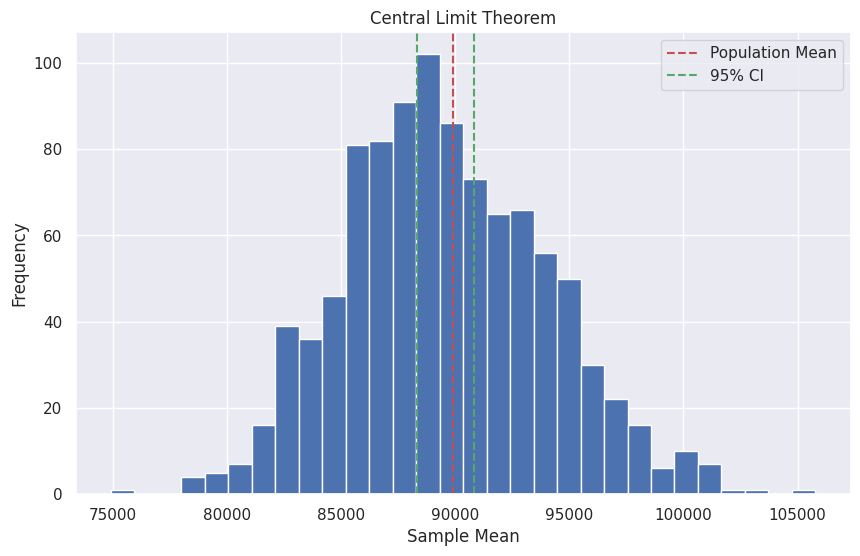

In [ ]:
# Extract Net Sales column as a numpy array
net_sales = df['Net Sales'].values

# Set number of samples and sample size
n_samples = 1000
sample_size = 50

# Initialize array to store sample means
sample_means = np.zeros(n_samples)

# Draw samples and compute means
for i in range(n_samples):
    sample = np.random.choice(net_sales, size=sample_size, replace=True)
    sample_means[i] = np.mean(sample)

# Compute population mean and standard deviation
pop_mean = np.mean(net_sales)
pop_std = np.std(net_sales)

# Compute sample mean and standard deviation
sample_mean = np.mean(sample_means)
sample_std = np.std(sample_means)

# Plot histogram of sample means
plt.hist(sample_means, bins=30)
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.title("Central Limit Theorem")

# Plot population mean and 95% confidence interval
plt.axvline(pop_mean, color='r', linestyle='--', label="Population Mean")
ci_low, ci_high = stats.t.interval(0.95, n_samples - 1, loc=sample_mean, scale=sample_std / np.sqrt(sample_size))
plt.axvline(ci_low, color='g', linestyle='--', label="95% CI")
plt.axvline(ci_high, color='g', linestyle='--')
plt.legend()

# Show plot
plt.show()


**Conclusion** : CLT Validates

*Bootstrap*

In [ ]:
# Load data into a pandas dataframe
df = pd.read_csv('Ayuda Organics Daily Sales.csv')

# Split data into two samples
sales_sample = df['Sales']
return_sample = df['Return']

# Define function to compute the difference between means
def mean_diff(data1, data2):
    return data1.mean() - data2.mean()

# Compute observed difference between means
obs_diff = mean_diff(sales_sample, return_sample)

# Set the number of bootstrap samples
n_bootstrap = 1000

# Create empty array to store bootstrap samples
bootstrap_diffs = np.empty(n_bootstrap)

# Generate bootstrap samples and compute difference between means for each
for i in range(n_bootstrap):
    sales_bootstrap = np.random.choice(sales_sample, size=len(sales_sample), replace=True)
    return_bootstrap = np.random.choice(return_sample, size=len(return_sample), replace=True)
    bootstrap_diffs[i] = mean_diff(sales_bootstrap, return_bootstrap)

# Compute 95% confidence interval for difference between means
ci_low, ci_high = np.percentile(bootstrap_diffs, [2.5, 97.5])

# Compute p-value
p_val = np.sum(bootstrap_diffs >= obs_diff) / len(bootstrap_diffs)

# Print results
print("Observed difference between means:", obs_diff)
print("95% confidence interval for difference between means:", (ci_low, ci_high))
print("p-value:", p_val)


Observed difference between means: 89920.44046575342
95% confidence interval for difference between means: (86616.37646712328, 93407.28753287668)
p-value: 0.494


**Conclusion** : The ***observed difference between means is 89920.44***, indicating a large difference between the means of two groups.

***The 95% confidence interval for the difference between means is (86616.38, 93407.29)***, suggesting that we can be 95% confident that the true difference between the means falls within this range.

The ***p-value is 0.494***, indicating that there is a high probability of observing a difference between the means as large as or larger than the observed difference under the null hypothesis of no difference. This suggests that we do not have sufficient evidence to reject the null hypothesis at a standard significance level of 0.05.

*Chi-Square Test*

In [ ]:

# Create a contingency table
contingency_table = pd.crosstab(df['Sales'], df['Return'])

# Perform the chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

Chi-square statistic: 66065.0
p-value: 0.308535872889653
Degrees of freedom: 65884
Expected frequencies:
 [[0.4630137  0.00273973 0.00273973 ... 0.00273973 0.00273973 0.00273973]
 [0.4630137  0.00273973 0.00273973 ... 0.00273973 0.00273973 0.00273973]
 [0.4630137  0.00273973 0.00273973 ... 0.00273973 0.00273973 0.00273973]
 ...
 [0.4630137  0.00273973 0.00273973 ... 0.00273973 0.00273973 0.00273973]
 [0.4630137  0.00273973 0.00273973 ... 0.00273973 0.00273973 0.00273973]
 [0.4630137  0.00273973 0.00273973 ... 0.00273973 0.00273973 0.00273973]]


**Conclusion** : The ***chi-square statistic of 66065.0*** indicates the degree to which the observed data deviates from the expected data under the null hypothesis. A larger value of the chi-square statistic indicates a greater degree of deviation from the expected data; The ***p-value of 0.308535872889653*** indicates the probability of observing a chi-square statistic as large as 66065.0, or even larger, assuming that the null hypothesis is true. In other words, if the null hypothesis is true (i.e., there is no significant association between the variables being tested), the p-value represents the probability of observing a chi-square statistic as extreme as the observed value by chance alone; The ***degrees of freedom of 65884*** indicate the number of independent observations that were used to calculate the chi-square statistic. Degrees of freedom are calculated as the number of categories being compared minus one. In this case, there were 65885 categories being compared, so the degrees of freedom are 65884.

**ANOVA** (*Analysis of Variance*) is a statistical technique used to determine whether there are significant differences between the means of two or more groups.

In [ ]:
import pandas as pd
import scipy.stats as stats

# Load the data into a pandas dataframe
df = pd.read_csv('Ayuda Organics Daily Sales.csv')

# Perform ANOVA test
fvalue, pvalue = stats.f_oneway(df['Sales'], df['Return'], df['Net Sales'])

# Print the results
print("F-value:", fvalue)
print("P-value:", pvalue)

F-value: 1270.6216195831591
P-value: 8.887460888580071e-286


**Conclusion** :  ***p-value (8.887460888580071e-286)*** suggests that the observed result is very unlikely to have occurred by chance, and provides strong evidence against the null hypothesis; ***f-value (1270.6216195831591)***,  indicates a very high F-value, which suggests a significant difference between the sample means

**AYUDA ORGANICS BRANDWISE ITEM LIST.csv**


In [ ]:
# Load the dataset
df = pd.read_csv('Ayuda Organics Brandwise Item List.csv')


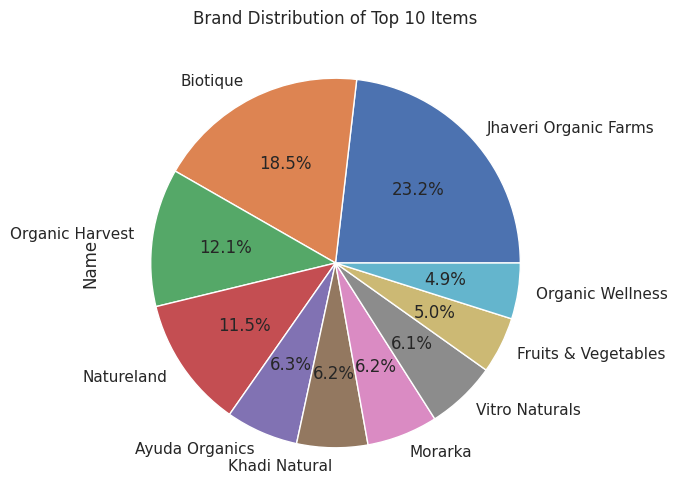

In [ ]:

# Group the data by brand and count the number of items
brand_counts = df.groupby('Brand Name').count()['Name']


# Get the top 10 items and their counts
top10_items = brand_counts.nlargest(10)


# Plot a pie chart to show the brand distribution of top 10 items
top10_items.plot(kind='pie', autopct='%1.1f%%')
plt.title('Brand Distribution of Top 10 Items')
plt.show()


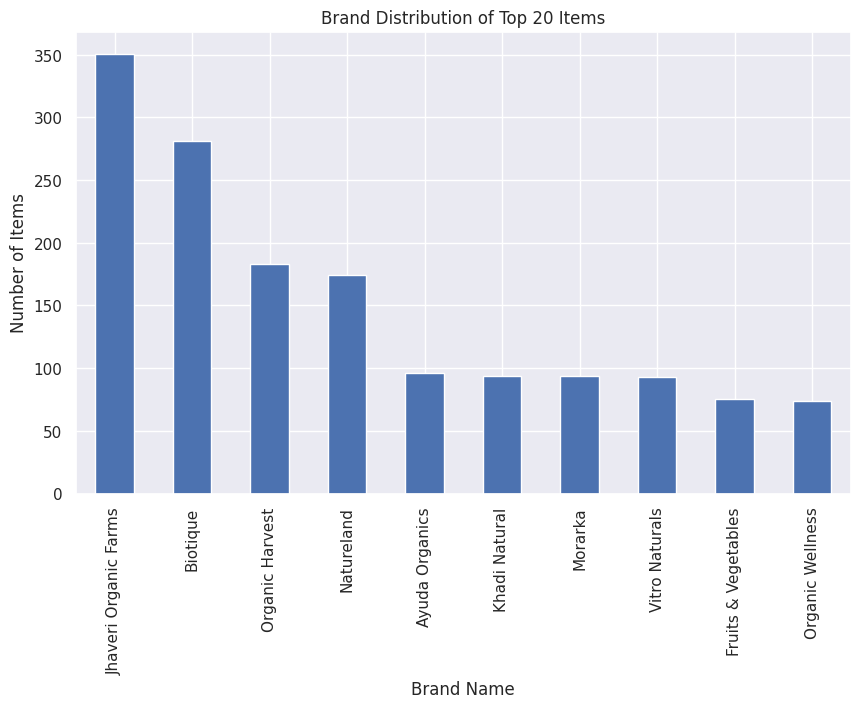

In [ ]:
# Plot a histogram to show the brand distribution of top 20 items
top10_items.plot(kind='bar')
plt.xlabel('Brand Name')
plt.ylabel('Number of Items')
plt.title('Brand Distribution of Top 20 Items')
plt.show()


*Brand Co-occurrence Heatmap*

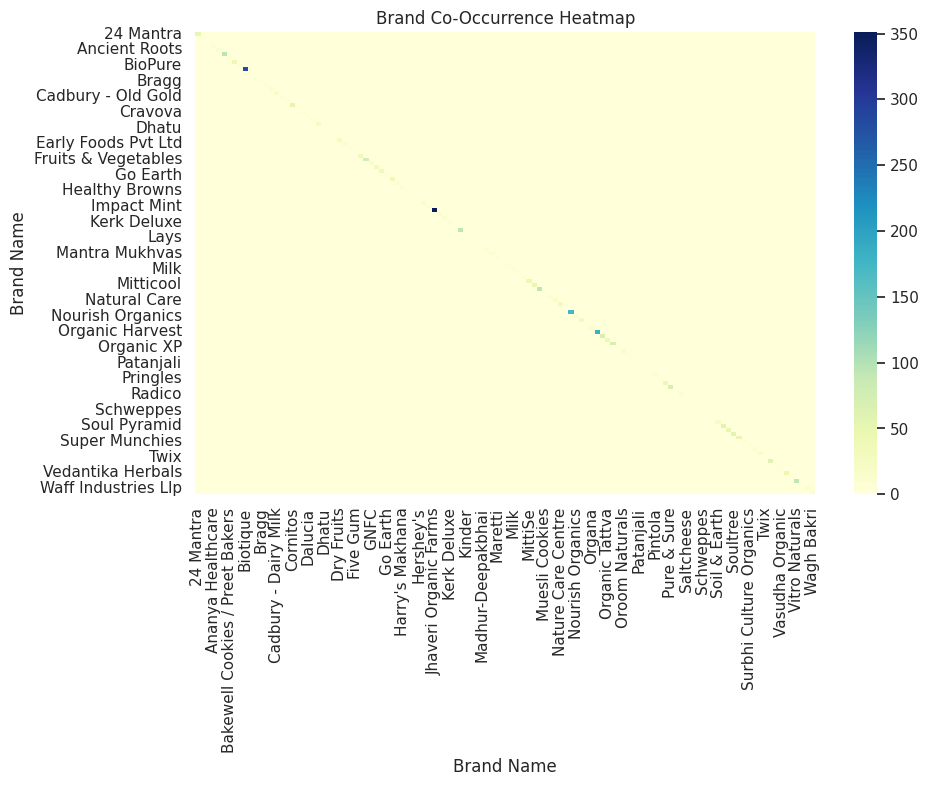

In [ ]:
# Load data from CSV file
data = pd.read_csv("Ayuda Organics Brandwise Item List.csv")


# Create a co-occurrence matrix of brand pairs
co_occurrence_matrix = pd.crosstab(data['Brand Name'], data['Brand Name'])


# Generate heatmap
sns.heatmap(co_occurrence_matrix, cmap="YlGnBu")
plt.title("Brand Co-Occurrence Heatmap")
plt.show()


***NOTE*** : Brand co-occurrence analysis can reveal patterns and associations between brands, which can be useful for understanding the relationships between them and for identifying potential marketing opportunities

In [ ]:
# Calculate the count, unique values, and frequency of each unique value for the 'Brand Name' column
brand_count = data['Brand Name'].count()
brand_unique = data['Brand Name'].unique()
brand_freq = data['Brand Name'].value_counts()

print(f"Brand count: {brand_count}")
# Create a pandas DataFrame to store the results
brand_summary = pd.DataFrame({'Brand Name': brand_unique,
                              'Count': brand_freq.values,
                              'Frequency': brand_freq.values / brand_count})

# Sort the results by frequency in descending order
brand_summary = brand_summary.sort_values(by='Frequency', ascending=False)

# Display the results
brand_summary.head()


Brand count: 3063


,Brand Name,Count,Frequency
0,24 Mantra,351,0.114594
1,Alkaline Water,281,0.091740
2,Amee Premium Kesar,183,0.059745
3,Ananya Healthcare,174,0.056807
4,Ancient Roots,96,0.031342


***Conclusion*** : The pie chart clearly shows the distribution of brands for the top 10 items. This information can be useful for businesses to make informed decisions on branding, marketing and sales strategies. The chart can also be used to identify potential areas of growth for certain brands and to understand the competitive landscape of the market.